In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games = pd.read_pickle('games.pkl')
moves = pd.read_pickle('moves.pkl')

## Games Data

In [3]:
display(games.head())

s = games.shape
print(f'There are {s[0]} games in the dataset.')

,Colour,Game,Result
0,White,1.0,0-1
1,Black,2.0,0-1
2,Black,3.0,1/2-1/2
3,White,4.0,0-1
4,Black,5.0,0-1


There are 2330 games in the dataset.


## Moves Data

In [4]:
display(moves[['Game', 'Piece', 'File', 'Rank', 'Castling', 'Check', 'Promotion', 'Take']].head())

s=moves.shape
print(f'There are {s[0]} moves in the dataset.')

,Game,Piece,File,Rank,Castling,Check,Promotion,Take
0,1.0,P,e,4,0.0,0.0,0.0,0.0
1,1.0,N,f,3,0.0,0.0,0.0,0.0
2,1.0,P,d,4,0.0,0.0,0.0,0.0
3,1.0,N,d,4,0.0,0.0,0.0,1.0
4,1.0,N,c,6,0.0,0.0,0.0,1.0


There are 83126 moves in the dataset.


In [12]:
pd.DataFrame(moves.Game.value_counts()).reset_index().sort_values(by="index").reset_index(drop=True).to_csv('Game_Lengths.csv')

In [5]:
d = dict(zip('abcdefgh', range(1,9)))
moves['File Value'] = moves['File'].apply(lambda x: d[x])

In [19]:
moves['Colour'] = moves['Game'].apply(lambda x: games.loc[games.Game == x]['Colour'].iloc[0])

In [24]:
moves['File Value'] = moves['File Value'].astype('int')
moves['Rank'] = moves['Rank'].astype('int')

In [25]:
moves['Perspective File'] = np.where(moves['Colour'] == "White", moves['File Value'], 9 - moves['File Value'])
moves['Perspective Rank'] = np.where(moves['Colour'] == "White", moves['Rank'], 9 - moves['Rank'])

In [26]:
moves.head()

,Castling,Check,File,Game,Piece,Promotion,Rank,Take,File Value,Colour,Perspective File,Perspective Rank
0,0.0,0.0,e,1.0,P,0.0,4,0.0,5,White,5,4
1,0.0,0.0,f,1.0,N,0.0,3,0.0,6,White,6,3
2,0.0,0.0,d,1.0,P,0.0,4,0.0,4,White,4,4
3,0.0,0.0,d,1.0,N,0.0,4,1.0,4,White,4,4
4,0.0,0.0,c,1.0,N,0.0,6,1.0,3,White,3,6


In [27]:
moves.to_csv('moves.csv')

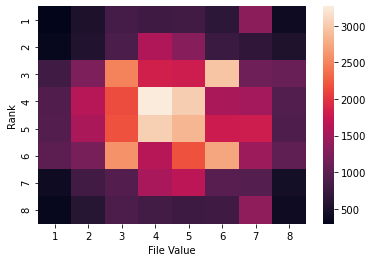

In [11]:
move_numbers = moves[['Rank', 'File Value']].value_counts().unstack()

sns.heatmap(move_numbers)

In [10]:
king_moves = moves[moves.Piece == 'K']
king_map = king_moves[['Rank', 'File Value']].value_counts().unstack()
sns.heatmap(king_map, cmap = cmap)

NameError: name 'cmap' is not defined

In [ ]:
queen_moves = moves[moves.Piece == 'Q']
queen_map = queen_moves[['Rank', 'File Value']].value_counts().unstack()
sns.heatmap(queen_map, cmap = cmap)

In [ ]:
rook_moves = moves[moves.Piece == 'R']
rook_map = rook_moves[['Rank', 'File Value']].value_counts().unstack()
sns.heatmap(rook_map, cmap = cmap)

In [ ]:
knight_moves = moves[moves.Piece == 'N']
knight_map = knight_moves[['Rank', 'File Value']].value_counts().unstack()
sns.heatmap(knight_map, cmap = cmap)

In [ ]:
bishop_moves = moves[moves.Piece == 'B']
bishop_map = bishop_moves[['Rank', 'File Value']].value_counts().unstack()
sns.heatmap(bishop_map, cmap = cmap)

In [ ]:
moves.to_csv('moves.csv')

In [ ]:
def parse_game(game_data):
    '''
    Describes movement of each piece throughout the game
    Inputs:
        game_data (Pandas.DataFrame): dataframe containing moves and other info
    Returns:
        lifecycles (dict): dictionary containing all moves for each piece 
    '''
    

In [14]:
game_data = moves.loc[moves.Game == 1]

In [22]:
colour = games.loc[games.Game == 1]['Colour'].iloc[0]

In [ ]:
starting_position = {'A pawn':()}